# gridded_data_tutorial
## Notebook 2: xarray
Waterhackweek 2020
Steven Pestana (spestana@uw.edu)
***

### xarray

The [xarray](https://xarray.pydata.org/) library allows us to read, manipulate, and create **labeled** multi-dimensional arrays and datasets, such as NetCDF files.



In [2]:
import xarray as xr

---
#### DataArrays
Similar to the `numpy.ndarray` object, the `xarray.DataArray` is a multi-dimensional array, with the addition of labeled dimensions, coordinates, and other metadata. A DataArray contains the following: 
* `values` which store the actual data values in a `numpy.ndarray`
* `dims` are the names for each dimension of the `values` array
* `coords` are arrays of labels for each point
* `attrs` is a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) that can contain additional metadata

Let's create some fake streamflow data for two locations to see how these different parts work together to form a DataArray. I'm going to use a NumPy function to generate some random numbers that are [normally distributed](https://numpy.org/devdocs/reference/random/generated/numpy.random.normal.html).

In [3]:
import numpy as np
import pandas as pd

In [85]:
# randomly generated annual peak streamflow data for three locations
means = [1000, 1400, 900]
standard_deviations = [75, 25, 50] 
samples = (100, 3)
peak_streamflow = np.random.normal(means, standard_deviations, samples)

`peak_flows` will be the `values` within the DataArray. It is a two-dimensional array, and we've given it a shape of 100x3. The two dimensions will need names (`dims`) and labels (`coords`):

In [86]:
# We can call our two dimensions time, and location corresponding to the dimensions with lengths 100 and 3 respectively
dimensions = ['time', 'location']

# We can create coordinates for each of these dimensions now, first starting with 100 years
times = pd.date_range('1920', periods=100, freq ='1Y')

# Now create the 3 location coordinates
locations = ['north_watershed', 'west_watershed', 'south_watershed']

Finally we can add additional metadata with a dictionary of attributes

In [87]:
metadata = {'units': 'cfs'}

Now that we have all the individual components of an xarray DataArray, we can create it

In [88]:
streamflow = xr.DataArray( peak_streamflow, coords=[times, locations], dims=dimensions,  name='streamflow', attrs=metadata)

In [89]:
streamflow

<xarray.DataArray 'streamflow' (time: 100, location: 3)>
array([[1076.13428826, 1424.98002754,  835.41323598],
       [1107.30944101, 1350.02299849,  880.77214371],
       [1080.36276082, 1424.43782547,  822.8247667 ],
       [ 994.1295631 , 1395.68030799,  832.02554985],
       [ 937.54412269, 1416.60902463,  920.74559506],
       [1099.75477352, 1374.23534845,  836.53935782],
       [1175.94406264, 1421.14658893,  950.9015339 ],
       [1121.21275164, 1414.66698886,  914.64298885],
       [1222.9762095 , 1445.80766622,  971.7246294 ],
       [1060.19417142, 1390.11561257,  925.10406917],
       [1141.29924401, 1338.7291907 ,  844.32549652],
       [1034.38042481, 1389.75798256,  922.44741394],
       [ 932.00447457, 1430.58757871,  927.11573153],
       [1091.09737409, 1405.70327394,  961.83376615],
       [ 878.6506107 , 1427.14008099,  850.76836646],
       [1139.32707198, 1425.27079855, 1009.16178957],
       [ 938.43582862, 1392.03042301,  889.60414217],
       [1097.13576893, 1425.14970614,  936.04803558],
       [ 988.14356068, 1443.56785197,  842.93704892],
       [ 963.81857801, 1396.03707203,  934.57164192],
       [ 966.4727909 , 1422.85252015,  902.95246097],
       [ 992.69964242, 1392.54371266,  842.66242514],
       [ 940.670493  , 1390.26324317,  890.54884782],
       [1195.44478496, 1399.7744717 ,  880.43593301],
       [ 952.66065519, 1368.93801103,  913.0295732 ],
       [1008.92352619, 1389.50333608,  961.96344255],
       [1021.49629228, 1394.56878599,  912.98313577],
       [ 964.61863013, 1340.32750457,  973.96599125],
       [1048.50746744, 1378.63481409,  907.37053767],
       [1050.05051933, 1392.27687152,  911.41530884],
       [ 894.56373201, 1393.01434222,  986.12558188],
       [ 992.57251528, 1371.38922113,  984.30715035],
       [1030.1621075 , 1375.30436653,  912.81012244],
       [1008.53943906, 1461.4912815 ,  850.95413155],
       [1162.05699397, 1445.41877759,  909.59176375],
       [1202.67938155, 1400.03938019,  906.17459244],
       [ 934.78255616, 1438.08724348,  883.61418312],
       [ 970.56784598, 1402.55037639,  856.98975071],
       [1027.08625164, 1357.1996743 ,  838.1552003 ],
       [ 931.20626796, 1417.70029866,  905.25484246],
       [ 932.71269332, 1383.99264151,  857.43784712],
       [ 983.35325017, 1378.63216012,  936.55668499],
       [1006.16283056, 1405.20443443,  904.55655089],
       [ 915.25920083, 1395.85919318,  898.0145249 ],
       [ 886.84229196, 1388.10163324,  892.78231489],
       [ 838.44304106, 1388.4753158 ,  815.77469994],
       [ 990.15116593, 1372.1014531 ,  802.14004125],
       [ 967.26083575, 1410.66956164,  876.68322858],
       [1131.92409546, 1372.14135535,  970.64576474],
       [1066.41530347, 1403.62253502,  813.16398274],
       [ 862.46459122, 1416.58630648,  953.01951095],
       [ 899.07983565, 1427.27782983,  878.4361988 ],
       [1006.17764959, 1390.50546558,  922.31782894],
       [1002.36684174, 1400.82108852,  883.85039366],
       [ 920.39941033, 1411.24917245, 1020.38262267],
       [ 920.20006136, 1392.3933191 ,  899.73327548],
       [1057.70627099, 1419.663677  ,  880.73863281],
       [ 995.11361153, 1425.69876728,  879.41914648],
       [1041.42931332, 1417.93368877,  871.38680805],
       [1001.48694312, 1437.58725405,  957.88409812],
       [ 962.38886995, 1385.84767391,  878.95690542],
       [ 946.59710546, 1401.91588124,  836.88777654],
       [ 940.37742335, 1431.80423082,  879.4390122 ],
       [1046.30264805, 1418.3969323 ,  936.94827516],
       [1130.303893  , 1381.74411864,  957.55000327],
       [ 975.91344962, 1386.71514828,  848.0405067 ],
       [ 993.55829953, 1387.12094255,  918.11879632],
       [1046.52911763, 1371.99099498,  941.96882637],
       [1040.23209072, 1400.13742738,  898.03993651],
       [ 937.45997504, 1398.354391  ,  883.74426423],
       [1137.51472846, 1377.53329091,  902.15957835],
       [ 852.73078419, 1350.28447958, 1015.31465171],
       [ 822.23129076, 1402.52916889,  971.47802692],
 

In [90]:
streamflow.dims

('time', 'location')

In [91]:
streamflow.coords

Coordinates:
  * time      (time) datetime64[ns] 1920-12-31 1921-12-31 ... 2019-12-31
  * location  (location) <U15 'north_watershed' ... 'south_watershed'

In [92]:
streamflow.attrs

{'units': 'cfs'}

In [93]:
#streamflows.values

---
#### Datasets

Create another DataArray with annual cumulative precipitation

In [94]:
# randomly generated annual cumulative precipitation data for three locations
means = [15, 20, 6]
standard_deviations = [3, 2, 6] 
samples = (100, 3)
cumulative_precip = np.random.normal(means, standard_deviations, samples)

In [95]:
precip = xr.DataArray( cumulative_precip, coords=[times, locations], dims=dimensions, name='precip', attrs={'units':'inches'})

Now combine and create a Dataset

In [96]:
my_data = xr.merge([streamflow, precip])

In [97]:
my_data

<xarray.Dataset>
Dimensions:     (location: 3, time: 100)
Coordinates:
  * time        (time) datetime64[ns] 1920-12-31 1921-12-31 ... 2019-12-31
  * location    (location) <U15 'north_watershed' ... 'south_watershed'
Data variables:
    streamflow  (time, location) float64 1.076e+03 1.425e+03 ... 1.365e+03 904.8
    precip      (time, location) float64 11.04 23.93 11.43 ... 14.92 16.98 3.071

# Indexing/slicing methods


https://xarray.pydata.org/en/stable/indexing.html


| Dimension lookup | Index lookup | DataArray syntax | Dataset syntax |
| ---              | ---          | ---              | ---            |
| positional       | by integer   | `da[:,0]`        | *n/a* |
| positional       | by label     | `da.loc[:,'stream_gage_1']` | *n/a* |
| by name          | by integer   | `da.isel(location=0)` | `ds.isel(location=0)` |
| by name          | by label     | `da.sel(location='stream_gage_1')` | `ds.sel(location='stream_gage_1')` |

Select and plot the time series of streamflow for the 0th location (**Positional**, by **integer**):

In [98]:
my_data.streamflow[:,0]

<xarray.DataArray 'streamflow' (time: 100)>
array([1076.13428826, 1107.30944101, 1080.36276082,  994.1295631 ,
        937.54412269, 1099.75477352, 1175.94406264, 1121.21275164,
       1222.9762095 , 1060.19417142, 1141.29924401, 1034.38042481,
        932.00447457, 1091.09737409,  878.6506107 , 1139.32707198,
        938.43582862, 1097.13576893,  988.14356068,  963.81857801,
        966.4727909 ,  992.69964242,  940.670493  , 1195.44478496,
        952.66065519, 1008.92352619, 1021.49629228,  964.61863013,
       1048.50746744, 1050.05051933,  894.56373201,  992.57251528,
       1030.1621075 , 1008.53943906, 1162.05699397, 1202.67938155,
        934.78255616,  970.56784598, 1027.08625164,  931.20626796,
        932.71269332,  983.35325017, 1006.16283056,  915.25920083,
        886.84229196,  838.44304106,  990.15116593,  967.26083575,
       1131.92409546, 1066.41530347,  862.46459122,  899.07983565,
       1006.17764959, 1002.36684174,  920.39941033,  920.20006136,
       1057.70627099,  995.11361153, 1041.42931332, 1001.48694312,
        962.38886995,  946.59710546,  940.37742335, 1046.30264805,
       1130.303893  ,  975.91344962,  993.55829953, 1046.52911763,
       1040.23209072,  937.45997504, 1137.51472846,  852.73078419,
        822.23129076,  941.71878686,  971.25070021, 1065.76225261,
        785.2826128 , 1065.23432057, 1003.05519225,  989.37984113,
       1031.81385154,  995.46798913, 1053.28056244, 1028.04224384,
       1070.7839859 , 1105.64210242,  999.38287593,  958.53354112,
        924.75303207,  991.96183936, 1033.88061456, 1042.74789114,
        905.18908258, 1100.55442611,  887.46180136, 1062.13340088,
        996.51873847,  975.71016477,  965.3345542 , 1012.7271304 ])
Coordinates:
  * time      (time) datetime64[ns] 1920-12-31 1921-12-31 ... 2019-12-31
    location  <U15 'north_watershed'
Attributes:
    units:    cfs

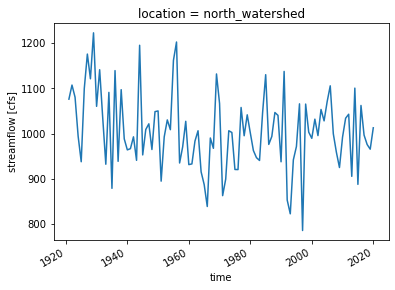

In [99]:
my_data.streamflow[:,0].plot()

**Positional**, by **label**:

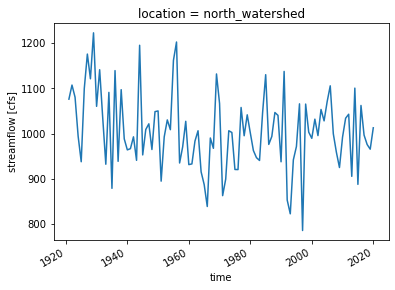

In [100]:
my_data.streamflow.loc[:,'north_watershed'].plot()

By **Name**, by **integer**:

In [101]:
my_data.isel(location=0)

<xarray.Dataset>
Dimensions:     (time: 100)
Coordinates:
  * time        (time) datetime64[ns] 1920-12-31 1921-12-31 ... 2019-12-31
    location    <U15 'north_watershed'
Data variables:
    streamflow  (time) float64 1.076e+03 1.107e+03 1.08e+03 ... 965.3 1.013e+03
    precip      (time) float64 11.04 13.65 15.61 16.27 ... 13.31 15.76 14.92

By **Name**, by **label**:

In [102]:
my_data.sel(location='north_watershed')

<xarray.Dataset>
Dimensions:     (time: 100)
Coordinates:
  * time        (time) datetime64[ns] 1920-12-31 1921-12-31 ... 2019-12-31
    location    <U15 'north_watershed'
Data variables:
    streamflow  (time) float64 1.076e+03 1.107e+03 1.08e+03 ... 965.3 1.013e+03
    precip      (time) float64 11.04 13.65 15.61 16.27 ... 13.31 15.76 14.92

---

Plot the fake data we just made

In [103]:
import matplotlib.pyplot as plt

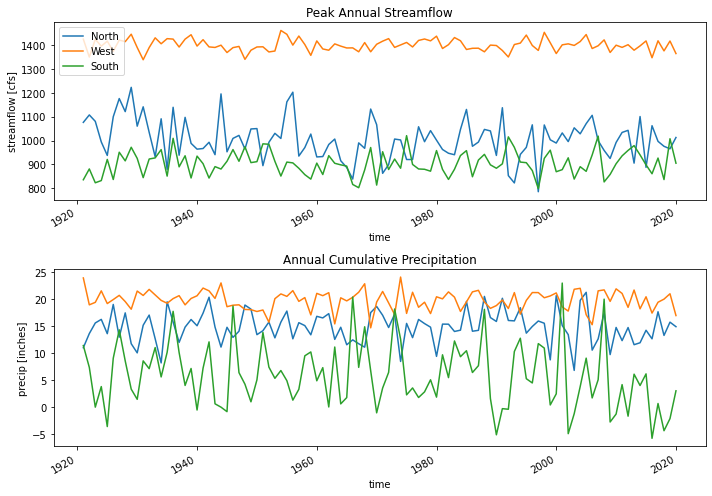

In [110]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7), tight_layout=True)


# Plot stream flow at each of the three sites

my_data.sel(location="north_watershed").streamflow.plot(ax=ax[0], label='North')
my_data.sel(location="west_watershed").streamflow.plot(ax=ax[0], label='West')
my_data.sel(location="south_watershed").streamflow.plot(ax=ax[0], label='South')

ax[0].legend(loc='upper left')
ax[0].set_title('Peak Annual Streamflow');



# Plot precipitation at each of the three sites

my_data.sel(location="north_watershed").precip.plot(ax=ax[1])
my_data.sel(location="west_watershed").precip.plot(ax=ax[1])
my_data.sel(location="south_watershed").precip.plot(ax=ax[1])

ax[1].set_title('Annual Cumulative Precipitation');

plt.savefig('my_data_plot.jpg')

To netcdf

In [106]:
my_data.to_netcdf('my_data.nc')

To pandas dataframe

In [108]:
my_data.to_dataframe()

To csv via a pandas dataframe

In [109]:
my_data.to_dataframe().to_csv('test.csv')